### Predicting Customer Churn in a Subscription-Based Business: A Machine Learning Approach


In today's competitive landscape, retaining customers is of paramount importance for subscription-based businesses. The ability to accurately predict customer churn — when a customer cancels their subscription — empowers businesses to proactively address issues, tailor retention strategies, and optimize customer experiences. This is where the potential of machine learning comes into play.

This project aims to develop a predictive model that anticipates customer churn in a subscription-based service. By leveraging historical customer data encompassing usage behavior and demographic insights, machine learning algorithms will be employed to forecast which customers are likely to churn. The implementation will involve key steps such as data preprocessing, feature engineering, model selection, and evaluation.

### Imports

In [1]:
import zipfile
import os
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Unzipping file

In [2]:
# Specify the path to the zip file and the destination directory for extraction
zip_file_path = 'Archive.zip'
extracted_folder_path = 'dataset'

# Create the destination directory if it doesn't exist
os.makedirs(extracted_folder_path, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

print("Extraction complete!")

Extraction complete!


### Loading data

In [3]:
df= pd.read_csv('dataset/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data cleaning and preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.shape

(10000, 14)

In [7]:
# Check for missing values in each column
missing_values = df.isnull().sum()

missing_values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

there are no missing values

In [8]:
# Check for duplicate rows
duplicates = df.duplicated()

# Print the duplicated rows
print(df[duplicates])

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


there are no duplicate rows

In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### checking for outliers

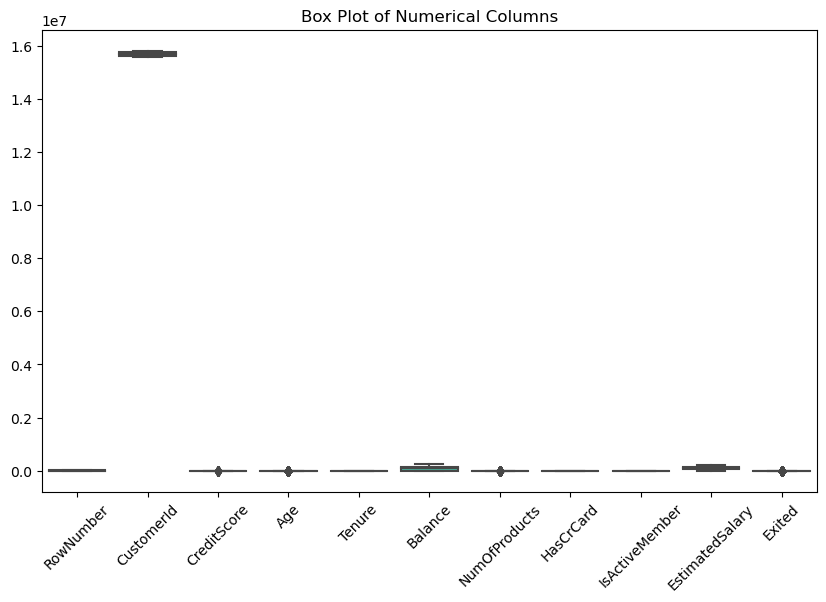

In [10]:

# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Create box plots to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=numerical_columns)
plt.xticks(rotation=45)
plt.title('Box Plot of Numerical Columns')
plt.show()


there appear to no outliers in relevant columns

### Check for class imbalance (exited).

In [11]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

we are dealing with an imbalanced dataset. it is important to balance in before proceeding with modelling

### Correlation Analysis 

In [12]:
correlation_matrix = df.corr()
fraud_corr = correlation_matrix['Exited'].sort_values(ascending=False)
print(fraud_corr)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64


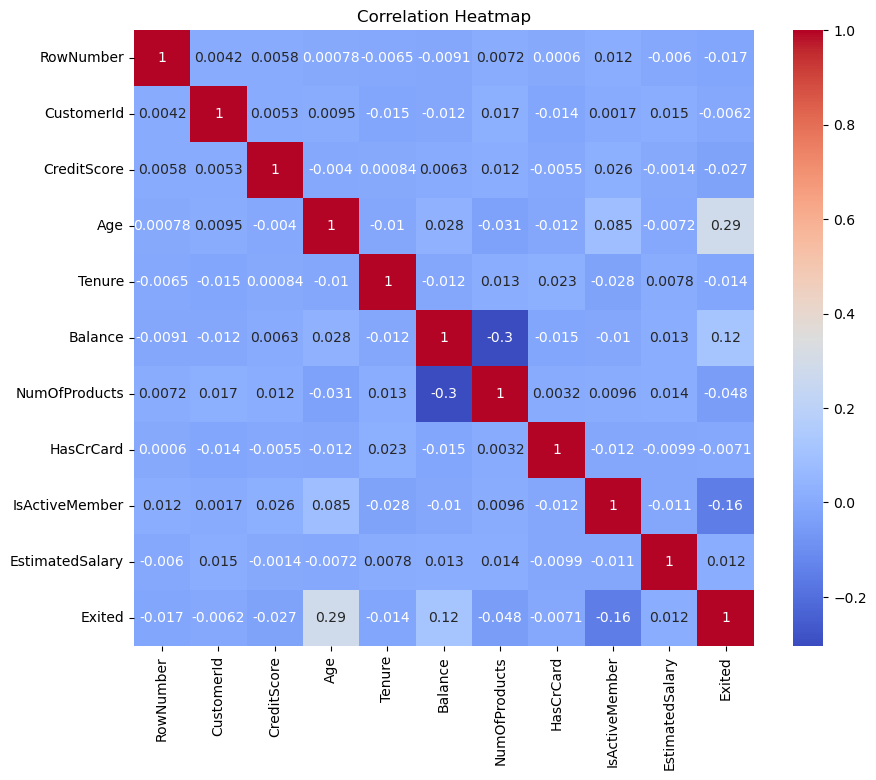

In [13]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Age: Positive correlation (0.285): Customers with higher ages are more likely to churn.
        
Balance: Positive correlation (0.119): Customers with higher balances are slightly more likely to churn.
        
EstimatedSalary: Positive correlation (0.012): Customers with higher estimated salaries have a very slight tendency to churn.

### Exploratory data analysis

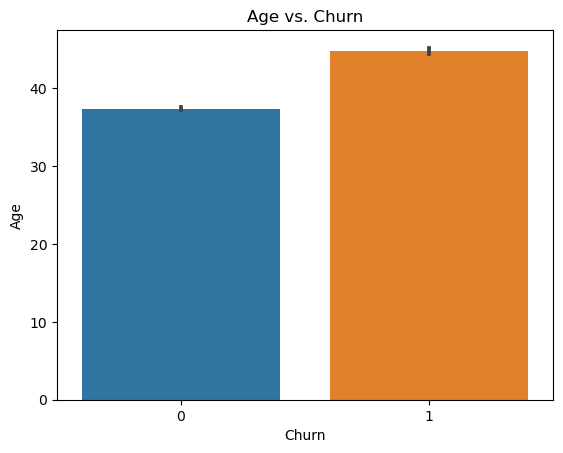

In [14]:
# Age vs churn

sns.barplot(x='Exited', y='Age', data=df)
plt.xlabel('Churn')
plt.ylabel('Age')
plt.title('Age vs. Churn')
plt.show()


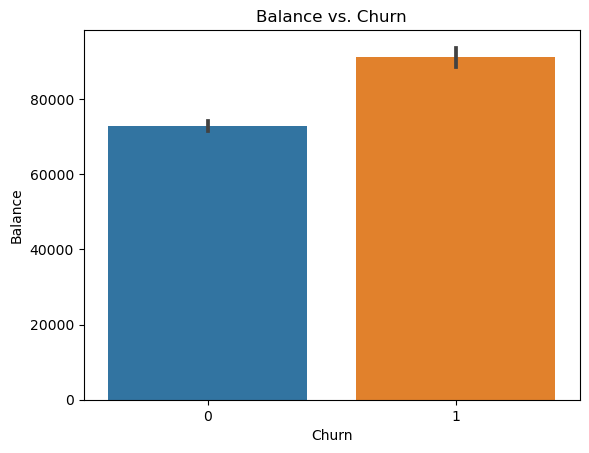

In [15]:
#Visualize the distribution of balances for churned and non-churned customers.
sns.barplot(x='Exited', y='Balance', data=df)
plt.xlabel('Churn')
plt.ylabel('Balance')
plt.title('Balance vs. Churn')
plt.show()


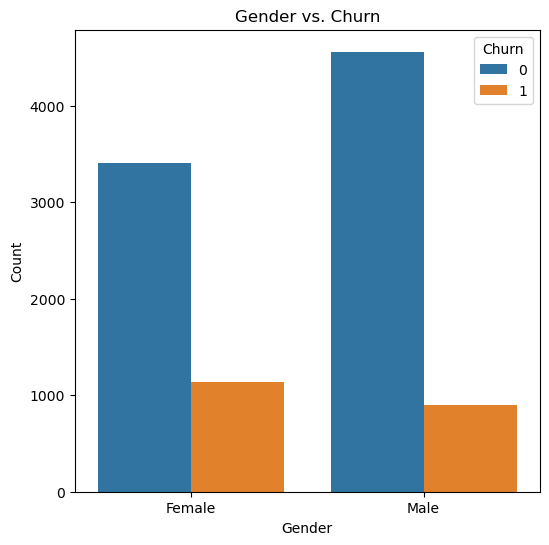

In [16]:
 #visualize the relationship between gender and customer churn:

# Countplot for Gender vs. Churn
plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', hue='Exited', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs. Churn')
plt.legend(title='Churn')
plt.show()


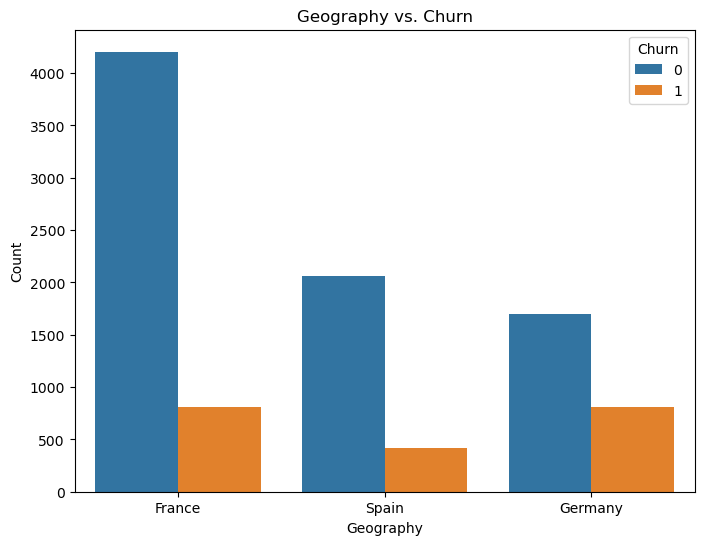

In [17]:
 #visualize the relationship between geography and customer churn:


# Countplot for Geography vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Geography vs. Churn')
plt.legend(title='Churn')
plt.show()


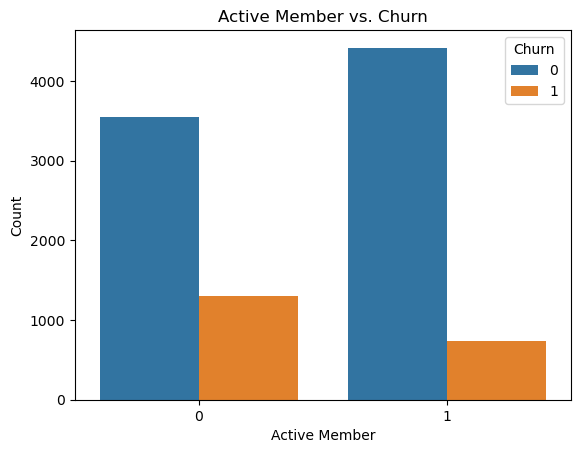

In [18]:
#Visualize the impact of active membership on churn.
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.xlabel('Active Member')
plt.ylabel('Count')
plt.title('Active Member vs. Churn')
plt.legend(title='Churn')
plt.show()


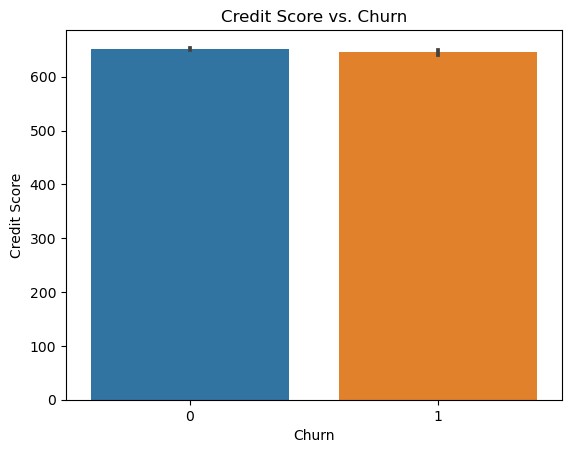

In [19]:
#Explore the relationship between credit scores and customer churn.
sns.barplot(x='Exited', y='CreditScore', data=df)
plt.xlabel('Churn')
plt.ylabel('Credit Score')
plt.title('Credit Score vs. Churn')
plt.show()


Customers with higher ages are more likely to churn.
Customers with higher balances are slightly more likely to churn.
Customers with higher estimated salaries have a very slight tendency to churn.
credit score seems not to have significant effect on churn so also does active membership

#### drop columns that are not needed

In [20]:

columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df.drop(columns=columns_to_drop, inplace=True)

# Display the updated DataFrame
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### One-hot encoding categorical variables

In [21]:
from sklearn.preprocessing import OneHotEncoder


# Select the categorical columns for one-hot encoding
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()


# Instantiate the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the encoder on the selected columns
encoded_categorical = encoder.fit_transform(df[categorical_columns])

# Create a DataFrame with the encoded features
encoded_data = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names(categorical_columns))

# Concatenate the encoded features with the original DataFrame
encoded_df = pd.concat([df, encoded_data], axis=1)

# Drop the original categorical columns
encoded_df.drop(columns=categorical_columns, inplace=True)

# Display the updated DataFrame
encoded_df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


## Building models

In [22]:
df_majority = encoded_df[(encoded_df['Exited']==0)] 
df_minority = encoded_df[(encoded_df['Exited']==1)]

In [23]:
df_majority.shape, df_minority.shape

((7963, 12), (2037, 12))

In [24]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

# Load and preprocess your dataset into 'encoded_df'

# Split data into features (X) and target (y)
X = encoded_df.drop('Exited', axis=1)
y = encoded_df['Exited']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create DataFrames for the resampled data
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name='Exited')

# Concatenate the resampled minority class with the majority class
final_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Now 'concatenated_df' contains the balanced dataset with the original majority class samples and the resampled minority class samples
# You can proceed with further analysis or modeling using this concatenated dataset


In [25]:
final_df.shape

(15926, 12)

In [26]:
df_majority = final_df[(final_df['Exited']==0)] 
df_minority = final_df[(final_df['Exited']==1)]

In [27]:
df_majority.shape, df_minority.shape

((7963, 12), (7963, 12))

In [28]:
X_resampled_df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [29]:
y_resampled_df

0        1
1        0
2        1
3        0
4        0
        ..
15921    1
15922    1
15923    1
15924    1
15925    1
Name: Exited, Length: 15926, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_df, y_resampled_df, test_size=0.2, random_state=42)



In [31]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

# Logistic Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_scaled, y_train)
y_pred_logreg = logreg_model.predict(X_test_scaled)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate models
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1633
           1       0.75      0.76      0.76      1553

    accuracy                           0.76      3186
   macro avg       0.76      0.76      0.76      3186
weighted avg       0.76      0.76      0.76      3186

Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1633
           1       0.91      0.88      0.89      1553

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186

Gradient Boosting:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1633
           1       0.90      0.85      0.88      1553

    accuracy                           0.88      3186
   macro avg       0.88      0.88      0.88      3186
weighted avg       

Logistic Regression:

Precision: Around 0.75 for both classes (churned and not churned), indicating that the model's predictions are about 75% accurate for both classes.
Recall: Around 0.76 for both classes, meaning that the model is correctly identifying about 76% of actual instances of both classes.
F1-score: Around 0.76 for both classes, which is the harmonic mean of precision and recall. It indicates the balance between precision and recall.
Accuracy: About 76%, which is the percentage of correctly predicted instances out of the total.
Random Forest:

Precision: High precision values (around 0.89 and 0.91), indicating that the model's predictions are accurate for both classes.
Recall: Good recall values (around 0.88 and 0.92), suggesting that the model is identifying a significant portion of actual instances for both classes.
F1-score: High F1-scores (around 0.89 and 0.90) for both classes, reflecting a good balance between precision and recall.
Accuracy: Around 90%, indicating a high percentage of correct predictions.
Gradient Boosting:

Precision: Good precision values (around 0.87 and 0.90), indicating accurate predictions for both classes.
Recall: Balanced recall values (around 0.85 and 0.91), suggesting that the model identifies a good portion of actual instances for both classes.
F1-score: High F1-scores (around 0.88 and 0.89) for both classes, indicating a good balance between precision and recall.
Accuracy: Around 88%, showing a high percentage of correct predictions.

## Cross_validation

In [33]:
from sklearn.model_selection import cross_val_score

# Create instances of your models (assuming you've already trained them)
logreg_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
logreg_scores = cross_val_score(logreg_model, X_train_scaled, y_train, cv=5, scoring='f1_macro')
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='f1_macro')
gb_scores = cross_val_score(gb_model, X_train_scaled, y_train, cv=5, scoring='f1_macro')

# Print the cross-validation scores
print("Logistic Regression CV Scores:", logreg_scores)
print("Random Forest CV Scores:", rf_scores)
print("Gradient Boosting CV Scores:", gb_scores)

# Print the mean and standard deviation of the CV scores
print("Logistic Regression Mean CV Score:", logreg_scores.mean())
print("Random Forest Mean CV Score:", rf_scores.mean())
print("Gradient Boosting Mean CV Score:", gb_scores.mean())


Logistic Regression CV Scores: [0.76558127 0.75027184 0.77274107 0.75972635 0.76868777]
Random Forest CV Scores: [0.88732097 0.88813997 0.88880286 0.89088164 0.89046819]
Gradient Boosting CV Scores: [0.88258128 0.87867592 0.88404787 0.87673868 0.86803227]
Logistic Regression Mean CV Score: 0.7634016615538914
Random Forest Mean CV Score: 0.8891227251678538
Gradient Boosting Mean CV Score: 0.8780152034696348


Based on these cross-validation results, the Random Forest model seems to have the highest mean CV score, indicating better overall performance compared to the other models on this specific dataset.